In [1]:
import numpy as np
import pandas as pd

datasets

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Rohit94\Documents\project_2023\EarthQuake Updated\EarthQuake Updated.csv")

In [3]:
df

latitude   longitude       depth   mag magType   rms net       id  \
0    -22.582779  -45.489305  510.998818  6.38      mw  0.33  hv     ev-0   
1     81.128575  -60.151645  129.158397  4.59      ml  0.82  pr     ev-1   
2     41.758910 -116.584591  242.647786  9.64      ml  0.99  us     ev-2   
3     17.758527   38.616001  464.296446  2.19      mw  0.84  us     ev-3   
4    -61.916645   -8.415302  337.462541  5.88      ms  0.35  us     ev-4   
...         ...         ...         ...   ...     ...   ...  ..      ...   
9995  64.378078  135.733906  666.592815  7.54      mw  0.52  pr  ev-9995   
9996  71.551590 -163.146975  523.476948  7.65      ml  0.73  nc  ev-9996   
9997  80.407425  -70.668551   13.619104  2.70      mb  0.82  ci  ev-9997   
9998 -18.452161  -20.404798  280.703390  4.34      ms  0.65  nc  ev-9998   
9999 -50.914727 -117.984667  180.178585  4.87      mb  0.79  uu  ev-9999   

         updated                place  depthError               Label  
0     2021-12-26         Tokyo, Japan        1.78  earthquake warning  
1     2022-02-07         Tokyo, Japan        1.90  earthquake warning  
2     2019-07-11  Mexico City, Mexico        0.42           explosion  
3     2024-03-12         Tehran, Iran        0.84       No earthquake  
4     2024-06-21     Kathmandu, Nepal        1.36  earthquake warning  
...          ...                  ...         ...                 ...  
9995  2022-09-08      California, USA        2.64           explosion  
9996  2018-09-03      Santiago, Chile        4.35           explosion  
9997  2018-07-02  Manila, Philippines        0.11       No earthquake  
9998  2019-05-04     Kathmandu, Nepal        0.68       No earthquake  
9999  2019-05-30        Mysore, India        0.85  earthquake warning  

[10000 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    10000 non-null  float64
 1   longitude   10000 non-null  float64
 2   depth       10000 non-null  float64
 3   mag         10000 non-null  float64
 4   magType     10000 non-null  object 
 5   rms         10000 non-null  float64
 6   net         10000 non-null  object 
 7   id          10000 non-null  object 
 8   updated     10000 non-null  object 
 9   place       10000 non-null  object 
 10  depthError  10000 non-null  float64
 11  Label       10000 non-null  object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [5]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'rms', 'net', 'id',
       'updated', 'place', 'depthError', 'Label'],
      dtype='object')

In [6]:
df.shape

(10000, 12)

In [7]:
df.describe()

latitude     longitude         depth           mag           rms  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.051280      1.630756    350.035276      4.987134      0.499677   
std       51.773423    104.146038    200.741630      2.889966      0.288820   
min      -89.997906   -179.943212      0.033687      0.000000      0.000000   
25%      -45.660804    -88.579511    177.623538      2.470000      0.250000   
50%       -1.344849      2.122840    351.447666      5.000000      0.500000   
75%       43.201143     92.332520    521.271698      7.470000      0.750000   
max       89.949181    179.972938    699.930684     10.000000      1.000000   

         depthError  
count  10000.000000  
mean       2.506473  
std        1.432303  
min        0.000000  
25%        1.260000  
50%        2.520000  
75%        3.740000  
max        5.000000

In [8]:
df.isnull().sum()

latitude      0
longitude     0
depth         0
mag           0
magType       0
rms           0
net           0
id            0
updated       0
place         0
depthError    0
Label         0
dtype: int64

<Axes: title={'center': 'Label Distribution'}>

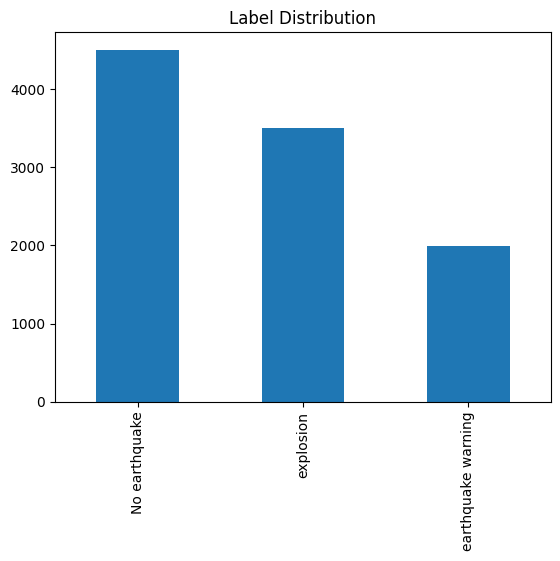

In [9]:
df['Label'].value_counts().plot(kind='bar', title='Label Distribution')


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

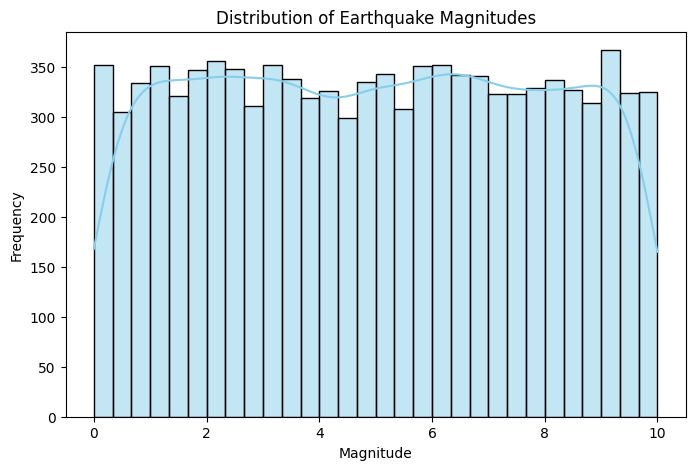

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['mag'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


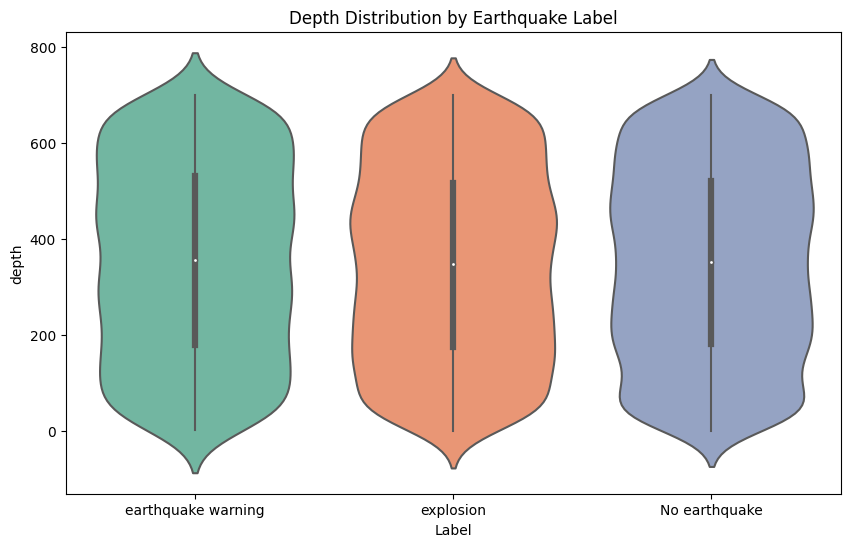

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Label', y='depth', data=df, palette='Set2')
plt.title('Depth Distribution by Earthquake Label')
plt.show()


In [13]:
import plotly.express as px

fig = px.scatter_geo(df, 
                     lat='latitude', lon='longitude', 
                     color='Label',
                     size='mag',
                     projection="natural earth",
                     title='Global Earthquake Events')
fig.show()


In [14]:
# sns.pairplot(df[['depth', 'mag', 'rms', 'depthError', 'Label']], hue='Label')
# plt.suptitle("Pairwise Feature Relationships", y=1.02)
# plt.show()


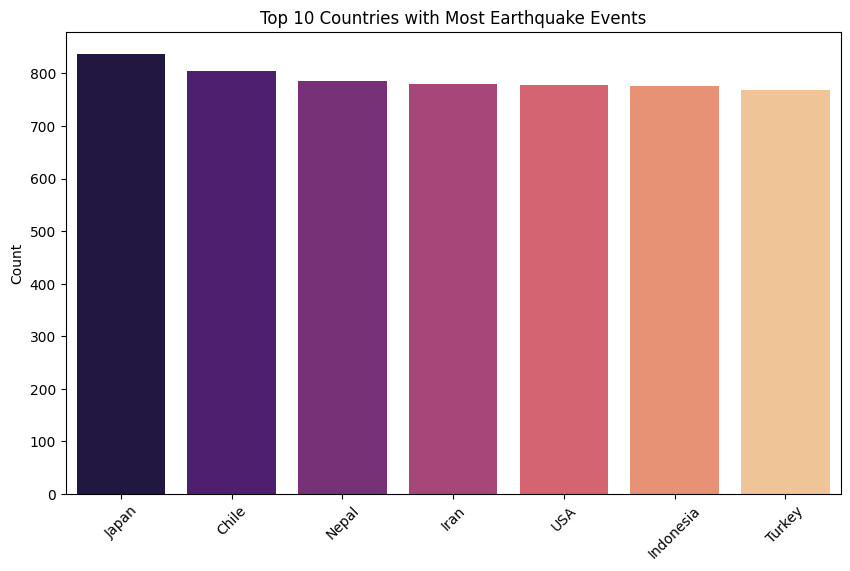

In [15]:
df['country'] = df['place'].apply(lambda x: x.split(",")[-1].strip())
top_countries = df['country'].value_counts().nlargest(7)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.title('Top 10 Countries with Most Earthquake Events')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


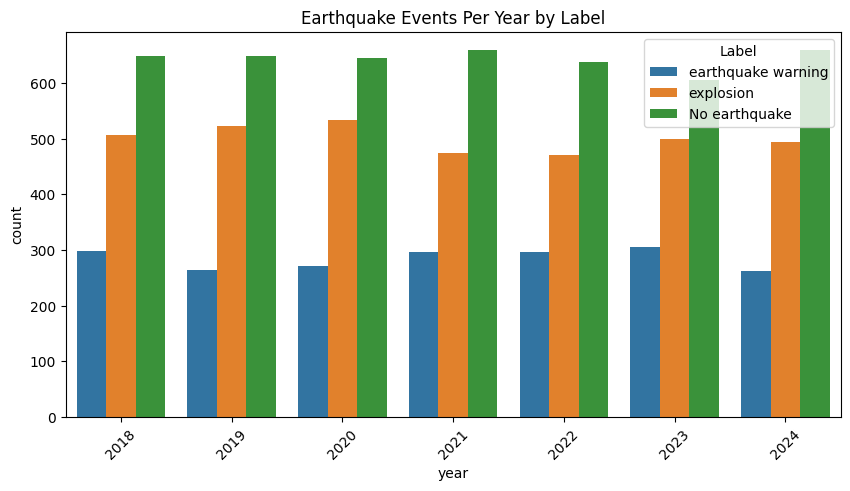

In [16]:
df['updated'] = pd.to_datetime(df['updated'])
df['year'] = df['updated'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(x='year', hue='Label', data=df)
plt.xticks(rotation=45)
plt.title("Earthquake Events Per Year by Label")
plt.show()


In [17]:
# Compute correlation for only numerical columns
correlation_matrix = df.corr(numeric_only=True)


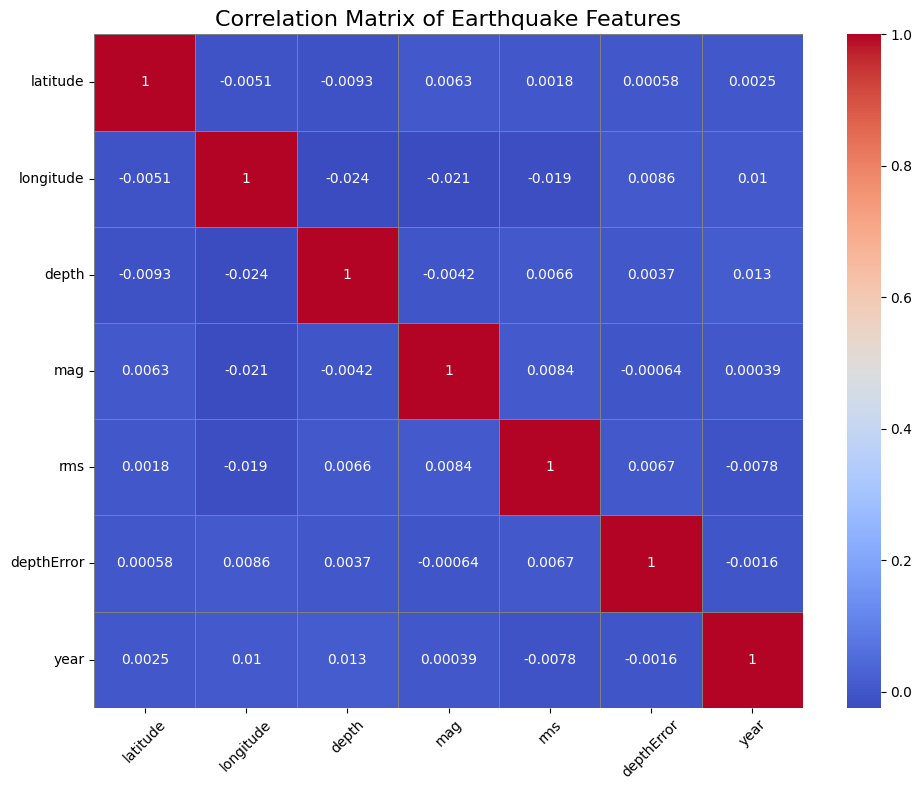

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix of Earthquake Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Encode categorical variables
le_label = LabelEncoder()
le_net = LabelEncoder()
le_magType = LabelEncoder()


In [21]:
df['Label_encoded'] = le_label.fit_transform(df['Label'])
df['net_encoded'] = le_net.fit_transform(df['net'])
df['magType_encoded'] = le_magType.fit_transform(df['magType'])

In [22]:
# Define features and target
features = ['latitude', 'longitude', 'depth', 'mag', 'rms', 'depthError']
X = df[features]
y = df['Label_encoded']

In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
acc=[]
model_name=[]

In [26]:
# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
acc.append(accuracy)
model_name.append('Random Forest Tree')

Accuracy: 1.00


In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00       700

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[911   0   0]
 [  0 389   0]
 [  0   0 700]]


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
import joblib

# Save model
model_path = r"C:\Users\Rohit94\Documents\project_2023\EarthQuake Updated\earthquake_model.pkl"
label_encoder_path = r"C:\Users\Rohit94\Documents\project_2023\EarthQuake Updated\label_encoder.pkl"
scaler_path = r"C:\Users\Rohit94\Documents\project_2023\EarthQuake Updated\scaler.pkl"

joblib.dump(model, model_path)
joblib.dump(le_label, label_encoder_path)
joblib.dump(scaler, scaler_path)

model_path, label_encoder_path, scaler_path

('C:\\Users\\Rohit94\\Documents\\project_2023\\EarthQuake Updated\\earthquake_model.pkl',
 'C:\\Users\\Rohit94\\Documents\\project_2023\\EarthQuake Updated\\label_encoder.pkl',
 'C:\\Users\\Rohit94\\Documents\\project_2023\\EarthQuake Updated\\scaler.pkl')

In [32]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    model_name.append(model_name1)
    print(f"\n🔍 Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


C:\Users\Rohit94\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.




🔍 Model: ['Random Forest Tree', 'K-Nearest Neighbors']
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       911
           1       0.77      0.76      0.77       389
           2       0.95      0.93      0.94       700

    accuracy                           0.91      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.91      0.91      0.91      2000



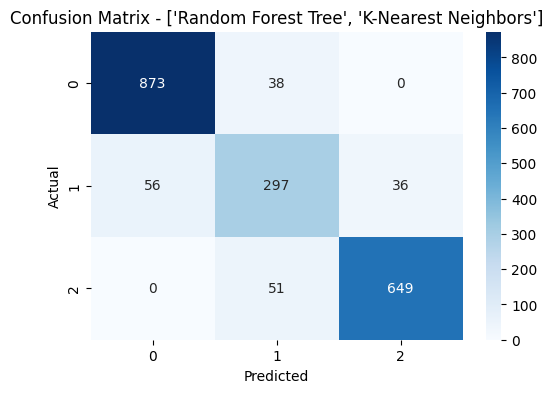


🔍 Model: ['Random Forest Tree', 'K-Nearest Neighbors', 'Naive Bayes']
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       0.99      0.99      0.99       389
           2       1.00      1.00      1.00       700

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



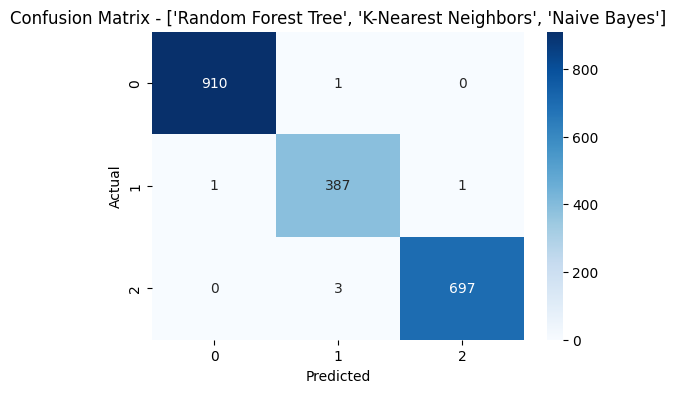


🔍 Model: ['Random Forest Tree', 'K-Nearest Neighbors', 'Naive Bayes', 'Decision Tree']
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00       700

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



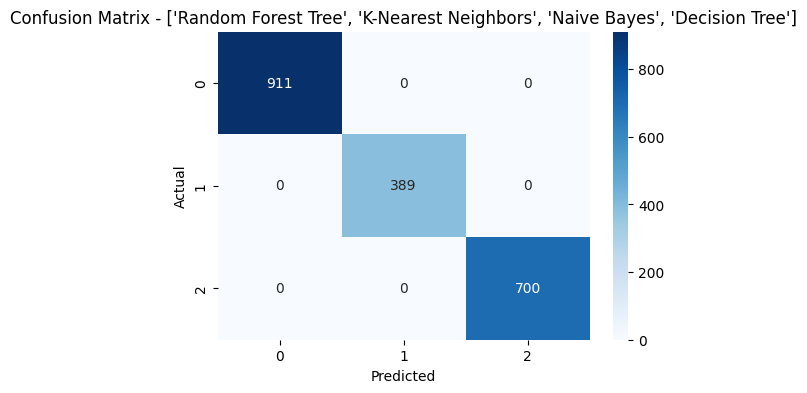

In [33]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

# Naive Bayes (GaussianNB)
nb = GaussianNB()
evaluate_model(nb, X_train, X_test, y_train, y_test, "Naive Bayes")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, X_test, y_train, y_test, "Decision Tree")


In [34]:
# Step 4: XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = xgb_model.predict(X_test)

# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\Rohit94\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00       700

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[911   0   0]
 [  0 389   0]
 [  0   0 700]]


In [35]:
acc.append(accuracy_score(y_test, y_pred))
model_name.append("XGBClassifier")

In [36]:
acc

[1.0, 0.9095, 0.997, 1.0, 1.0]

In [37]:
model_name

['Random Forest Tree',
 'K-Nearest Neighbors',
 'Naive Bayes',
 'Decision Tree',
 'XGBClassifier']

<Axes: title={'center': 'Accuracy Comparison 80% Train and 20% Test Dataset'}, xlabel='Accuracy', ylabel='Algorithm'>

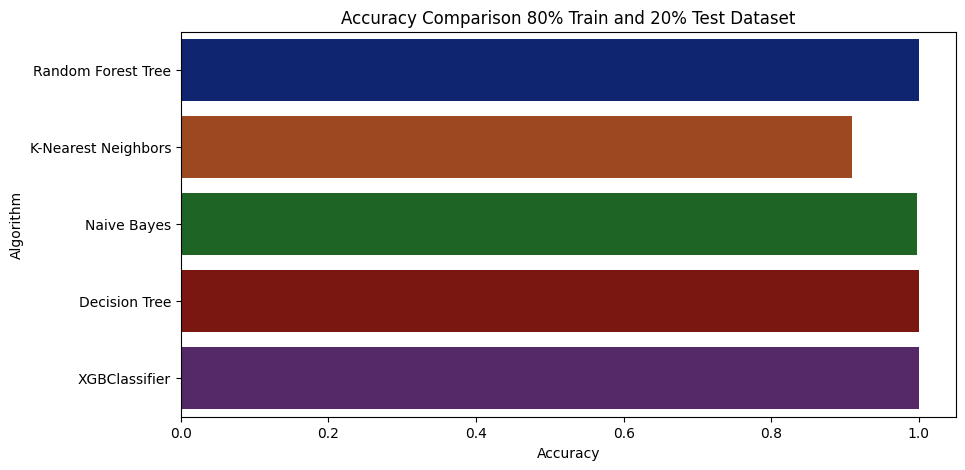

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison 80% Train and 20% Test Dataset')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =model_name,palette='dark')

In [39]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# If X_train is a DataFrame, extract feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train.shape[1])]

# Initialize the explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=model.classes_,
    mode='classification'
)


In [40]:
# Choose an instance to explain
i = 0  # Change to any index of interest
instance = X_test[i]

# Generate explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba
)

# Display the explanation
exp.show_in_notebook(show_table=True)


In [41]:
feature_names = [
    'latitude',
    'longitude',
    'depth',
    'mag',
    'rms',
    'depthError',
    'net_encoded',      # or encoded form of net
    'magType_encoded'   # if you encoded magType
]


In [42]:
from lime.lime_tabular import LimeTabularExplainer

# Define feature names manually
feature_names = ['latitude', 'longitude', 'depth', 'mag', 'rms', 'depthError', 'net_encoded', 'magType_encoded']

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=model.classes_,
    mode='classification'
)

# Explain one instance
i = 0
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=model.predict_proba
)

# Display result in notebook
exp.show_in_notebook(show_table=True)



# Kmeans Clustering

In [43]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Rohit94\Documents\project_2023\EarthQuake Updated\EarthQuake Updated.csv")

In [44]:
# Only select rows with 'earthquake warning'
eq_warning_df = df[df['Label'] == 'earthquake warning'].copy()
print(eq_warning_df.shape)

(1996, 12)


In [45]:
eq_warning_df

latitude   longitude       depth   mag magType   rms net       id  \
0    -22.582779  -45.489305  510.998818  6.38      mw  0.33  hv     ev-0   
1     81.128575  -60.151645  129.158397  4.59      ml  0.82  pr     ev-1   
4    -61.916645   -8.415302  337.462541  5.88      ms  0.35  us     ev-4   
25    51.331673 -125.226761  269.796925  4.76      ms  0.79  ak    ev-25   
30    19.358073 -178.077909  549.811522  6.32      ml  0.90  ci    ev-30   
...         ...         ...         ...   ...     ...   ...  ..      ...   
9980 -26.296980  140.385644  156.210410  5.69      ms  0.50  hv  ev-9980   
9991 -31.476073   93.356485  543.949694  5.61      mb  0.95  hv  ev-9991   
9992  -5.200136 -147.774348  110.781692  5.59      ms  0.61  nc  ev-9992   
9993  57.372838   -2.640879   86.312944  4.52      mb  0.50  nc  ev-9993   
9999 -50.914727 -117.984667  180.178585  4.87      mb  0.79  uu  ev-9999   

         updated               place  depthError               Label  
0     2021-12-26        Tokyo, Japan        1.78  earthquake warning  
1     2022-02-07        Tokyo, Japan        1.90  earthquake warning  
4     2024-06-21    Kathmandu, Nepal        1.36  earthquake warning  
25    2018-09-11     Santiago, Chile        3.35  earthquake warning  
30    2022-12-17         Rome, Italy        1.25  earthquake warning  
...          ...                 ...         ...                 ...  
9980  2020-02-26     Santiago, Chile        0.22  earthquake warning  
9991  2023-08-22        Tehran, Iran        0.84  earthquake warning  
9992  2018-08-07  Jakarta, Indonesia        4.52  earthquake warning  
9993  2020-05-02     California, USA        0.66  earthquake warning  
9999  2019-05-30       Mysore, India        0.85  earthquake warning  

[1996 rows x 12 columns]

In [46]:
features_eq = ['mag', 'depth', 'rms', 'depthError']
X_eq = eq_warning_df[features_eq]

# Standardize
scaler_eq = StandardScaler()
X_eq_scaled = scaler_eq.fit_transform(X_eq)


In [47]:
from sklearn.cluster import KMeans

# Cluster into 3 groups (Minimum, Moderate, Severe)
kmeans = KMeans(n_clusters=3, random_state=42)
eq_warning_df['Cluster'] = kmeans.fit_predict(X_eq_scaled)


In [48]:
# Calculate average magnitude per cluster
cluster_centers = kmeans.cluster_centers_
cluster_mags = scaler_eq.inverse_transform(cluster_centers)[:, 0]  # 0 = mag index

for i, mag in enumerate(cluster_mags):
    print(f"Cluster {i}: Average Magnitude {mag:.2f}")


Cluster 0: Average Magnitude 5.65
Cluster 1: Average Magnitude 5.43
Cluster 2: Average Magnitude 5.46


In [49]:
X_eq_scaled

array([[ 1.52624634,  0.77006499, -0.56605723, -0.50439339],
       [-1.59771686, -1.10950005,  1.10744078, -0.41967109],
       [ 0.65363092, -0.08414714, -0.49775118, -0.80092143],
       ...,
       [ 0.14751398, -1.19995724,  0.39022735,  1.43009911],
       [-1.71988302, -1.32040181,  0.01454412, -1.29513484],
       [-1.10905223, -0.85835911,  1.00498171, -1.1609912 ]])

In [50]:
eq_warning_df["Cluster"].value_counts()

1    762
2    622
0    612
Name: Cluster, dtype: int64

In [51]:
# Features
X_cluster = eq_warning_df[features_eq]

# Target
y_cluster = eq_warning_df['Cluster']

# Train-test split
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

# Scale features
scaler_cluster = StandardScaler()
X_train_c_scaled = scaler_cluster.fit_transform(X_train_c)
X_test_c_scaled = scaler_cluster.transform(X_test_c)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_c_scaled, y_train_c)
y_pred_rf = rf_model.predict(X_test_c_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test_c, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_rf):.2f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       132
           1       0.95      0.97      0.96       150
           2       0.97      0.97      0.97       118

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.96      0.95      0.95       400

Accuracy: 0.95


In [53]:
import joblib

joblib.dump(rf_model, "earthquake_severity_model.pkl")
joblib.dump(scaler_cluster, "earthquake_severity_scaler.pkl")


['earthquake_severity_scaler.pkl']

In [54]:
eq_warning_df

latitude   longitude       depth   mag magType   rms net       id  \
0    -22.582779  -45.489305  510.998818  6.38      mw  0.33  hv     ev-0   
1     81.128575  -60.151645  129.158397  4.59      ml  0.82  pr     ev-1   
4    -61.916645   -8.415302  337.462541  5.88      ms  0.35  us     ev-4   
25    51.331673 -125.226761  269.796925  4.76      ms  0.79  ak    ev-25   
30    19.358073 -178.077909  549.811522  6.32      ml  0.90  ci    ev-30   
...         ...         ...         ...   ...     ...   ...  ..      ...   
9980 -26.296980  140.385644  156.210410  5.69      ms  0.50  hv  ev-9980   
9991 -31.476073   93.356485  543.949694  5.61      mb  0.95  hv  ev-9991   
9992  -5.200136 -147.774348  110.781692  5.59      ms  0.61  nc  ev-9992   
9993  57.372838   -2.640879   86.312944  4.52      mb  0.50  nc  ev-9993   
9999 -50.914727 -117.984667  180.178585  4.87      mb  0.79  uu  ev-9999   

         updated               place  depthError               Label  Cluster  
0     2021-12-26        Tokyo, Japan        1.78  earthquake warning        2  
1     2022-02-07        Tokyo, Japan        1.90  earthquake warning        1  
4     2024-06-21    Kathmandu, Nepal        1.36  earthquake warning        2  
25    2018-09-11     Santiago, Chile        3.35  earthquake warning        1  
30    2022-12-17         Rome, Italy        1.25  earthquake warning        1  
...          ...                 ...         ...                 ...      ...  
9980  2020-02-26     Santiago, Chile        0.22  earthquake warning        2  
9991  2023-08-22        Tehran, Iran        0.84  earthquake warning        1  
9992  2018-08-07  Jakarta, Indonesia        4.52  earthquake warning        0  
9993  2020-05-02     California, USA        0.66  earthquake warning        2  
9999  2019-05-30       Mysore, India        0.85  earthquake warning        1  

[1996 rows x 13 columns]